In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('wisc_bc_data (1).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
df.shape

(569, 32)

In [6]:
X=df.drop(['id','diagnosis'],axis=1)

In [7]:
df['diagnosis'].replace({'B':0, 'M':1}, inplace=True)

In [8]:
y=df['diagnosis']

In [20]:
df1=pd.DataFrame(df.corr()['diagnosis'])
df1=df1.rename_axis('index1').reset_index()
df1.drop(1,inplace=True)

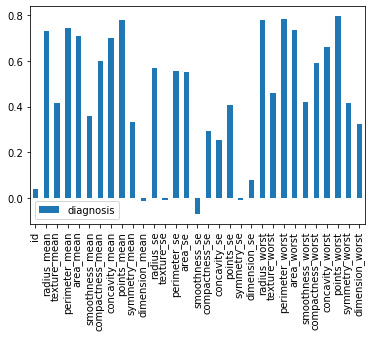

In [10]:
chart = df1.plot(kind='bar')
chart.set_xticklabels(df1.index1)
plt.show()

### Checking Statistical Dependance of every column with the target 

In [11]:
from scipy.stats import ttest_ind

In [12]:
diag_0 = df[df['diagnosis']==0]
diag_1 = df[df['diagnosis']==1]

In [13]:
l=[]
for col in X.columns:
    pvalue=ttest_ind(diag_0[col],diag_1[col])[1]
    if pvalue > 0.05:
        l.append(col)

In [14]:
l

['dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'dimension_se']

In [15]:
X.drop(l,axis=1,inplace=True)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.2360,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.4505,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.1967,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.3384,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.1783,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


### Scaling Data

For all classification problems, scale the data ( that too, important for distance calculation algms)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import cross_val_score

In [18]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
Bag=BaggingClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()

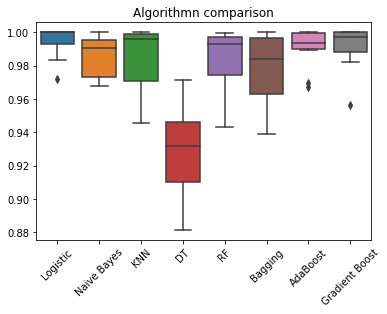

In [19]:
models=[]
models.append(('Logistic',LR))
models.append(('Naive Bayes',NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RF',RF))
models.append(('Bagging',Bag))
models.append(('AdaBoost',AB))
models.append(('Gradient Boost',GB))

results=[]
names=[]

for name,model in models:
    scores = cross_val_score(model, X,y, cv=10, scoring='roc_auc')
    results.append(scores)
    names.append(name)

chart = sns.boxplot(names,results)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title('Algorithmn comparison')
plt.show()